In [14]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
with open("C:/Users/ASUS/Downloads/cov_glue.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
table1 = soup.find('table', id='mutTable')

In [58]:
table=[]
for i in table1.find_all('tr'):
    line = []
    for j in i.find_all('td'):
        line.append(j.text)
    table.append(line)

In [59]:
headers = table[0]
mut_table = table[1:]

In [60]:
df = pd.DataFrame(mut_table, columns = headers)

In [61]:
df.to_csv("D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data/cov_glue_mut.csv")

In [62]:
df['AA_from'] = df['Mutation'].astype(str).str[0]
df['AA_to'] = df['Mutation'].astype(str).str[-1]

In [63]:
df = df.dropna()

In [64]:
df

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to
0,All,S,614,D614G,,nonsyn,23402,23403,23404,gAt,gGt,5182511,0.991216,D,G
1,All,ORF1ab/nsp12,323,P323L,P4715L,nonsyn,14407,14408,14409,cCt,cTt,5144375,0.983923,P,L
2,All,S,452,L452R,,nonsyn,22916,22917,22918,cTg,cGg,2772069,0.530191,L,R
3,All,M,82,I82T,,nonsyn,26766,26767,26768,aTc,aCc,2769241,0.52965,I,T
4,All,S,681,P681R,,nonsyn,23603,23604,23605,cCt,cGt,2762560,0.528372,P,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86977,All,N,47,N47Q,,nonsyn,28412,28413,28414,AaT,CaG,1,0,N,Q
86978,All,N,47,N47H,,nonsyn,28412,28413,28414,AaT,CaC,1,0,N,H
86979,All,N,48,N48C,,nonsyn,28415,28416,28417,AAt,TGt,1,0,N,C
86980,All,N,48,N48Q,,nonsyn,28415,28416,28417,AaT,CaA,2,0,N,Q


In [65]:
df['nuc_change_num'] = 1
for index, row in df.iterrows():
    counter = 0 
    for ch in df['RefCodon'][index]:
        if ch.isupper():
            counter += 1
    if counter != 1:
        df['nuc_change_num'][index] = counter
        
df = df[df['nuc_change_num'] == 1]
df = df.reset_index(drop=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3076/67643137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nuc_change_num'][index] = counter


In [66]:
from_nuc=[]
for codon in df['RefCodon']:
    uppernuc=''
    for nuc in codon:
        if nuc.isupper():
            uppernuc+=nuc
    from_nuc.append(uppernuc)
    
to_nuc=[]
for codon in df['MutCodon']:
    uppernuc=''
    for nuc in codon:
        if nuc.isupper():
            uppernuc+=nuc
    to_nuc.append(uppernuc)

In [67]:
df['from_nuc'] = from_nuc
df['to_nuc'] = to_nuc

In [68]:
df['mut_status'] = 0

In [69]:
df

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to,nuc_change_num,from_nuc,to_nuc,mut_status
0,All,S,614,D614G,,nonsyn,23402,23403,23404,gAt,gGt,5182511,0.991216,D,G,1,A,G,0
1,All,ORF1ab/nsp12,323,P323L,P4715L,nonsyn,14407,14408,14409,cCt,cTt,5144375,0.983923,P,L,1,C,T,0
2,All,S,452,L452R,,nonsyn,22916,22917,22918,cTg,cGg,2772069,0.530191,L,R,1,T,G,0
3,All,M,82,I82T,,nonsyn,26766,26767,26768,aTc,aCc,2769241,0.52965,I,T,1,T,C,0
4,All,S,681,P681R,,nonsyn,23603,23604,23605,cCt,cGt,2762560,0.528372,P,R,1,C,G,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59018,All,N,42,P42H,,nonsyn,28397,28398,28399,cCc,cAc,2,0,P,H,1,C,A,0
59019,All,N,42,P42R,,nonsyn,28397,28398,28399,cCc,cGc,1,0,P,R,1,C,G,0
59020,All,N,43,Q43P,,nonsyn,28400,28401,28402,cAa,cCa,2,0,Q,P,1,A,C,0
59021,All,N,45,L45F,,nonsyn,28406,28407,28408,ttA,ttC,2,0,L,F,1,A,C,0


In [70]:
df.loc[((df['from_nuc'] == 'C') | (df['from_nuc'] == 'G')) & (df['to_nuc'] =='T'),'mut_status'] = 1
df.loc[((df['to_nuc'] == 'C') | (df['to_nuc'] == 'G')) & (df['from_nuc'] =='T'),'mut_status'] = -1

In [71]:
df["Proportion"] = pd.to_numeric(df["Proportion"])

In [72]:
df.loc[df['mut_status']==0,'mut_status_char']="unknown"
df.loc[df['mut_status']==1,'mut_status_char']="C>U G>U"
df.loc[df['mut_status']==-1,'mut_status_char']="U>C U>G"

In [73]:
df['mut_status_char'].value_counts()

unknown    39919
U>C U>G     9970
C>U G>U     9134
Name: mut_status_char, dtype: int64

Всего C>U G>U мутаций 9134. В обратную сторону 9970. Остальное - другие мутации (67878).

In [74]:
df = df.sort_values(by='Proportion', ascending=False)
df.head()

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to,nuc_change_num,from_nuc,to_nuc,mut_status,mut_status_char
0,All,S,614,D614G,,nonsyn,23402,23403,23404,gAt,gGt,5182511,0.991216,D,G,1,A,G,0,unknown
1,All,ORF1ab/nsp12,323,P323L,P4715L,nonsyn,14407,14408,14409,cCt,cTt,5144375,0.983923,P,L,1,C,T,1,C>U G>U
2,All,S,452,L452R,,nonsyn,22916,22917,22918,cTg,cGg,2772069,0.530191,L,R,1,T,G,-1,U>C U>G
3,All,M,82,I82T,,nonsyn,26766,26767,26768,aTc,aCc,2769241,0.529650,I,T,1,T,C,-1,U>C U>G
4,All,S,681,P681R,,nonsyn,23603,23604,23605,cCt,cGt,2762560,0.528372,P,R,1,C,G,0,unknown


In [75]:
df.to_csv('cov_glue_all.csv')

# Все регионы

Для начала сделаю бинами по 500 мутаций в бине

In [76]:
binnumber = 0
bins = pd.DataFrame()
for i in range(0,len(df),500):
    if i != 0:
        dfbin = df[i-500:i]
        
        dfbininterest = len(dfbin[dfbin['mut_status'] == 1])
        dfbinopposite = len(dfbin[dfbin['mut_status'] == -1])
        dfbinother = len(dfbin[dfbin['mut_status'] == 0])
        
        onebin = pd.DataFrame({'bin_number':binnumber, 'spec_number':dfbininterest,
                               'oppos_spec_number':dfbinopposite, 'other_number':dfbinother}, index=[binnumber])
        binnumber+=1
        bins = bins.append(onebin)

In [77]:
bins

,bin_number,spec_number,oppos_spec_number,other_number
0,0,341,28,131
1,1,412,13,75
2,2,371,28,101
3,3,327,34,139
4,4,266,32,202
...,...,...,...,...
113,113,5,97,398
114,114,1,92,407
115,115,2,102,396
116,116,0,98,402


Для начала просто посмотрим на графики переменных, а затем уже красивые графики сделаем

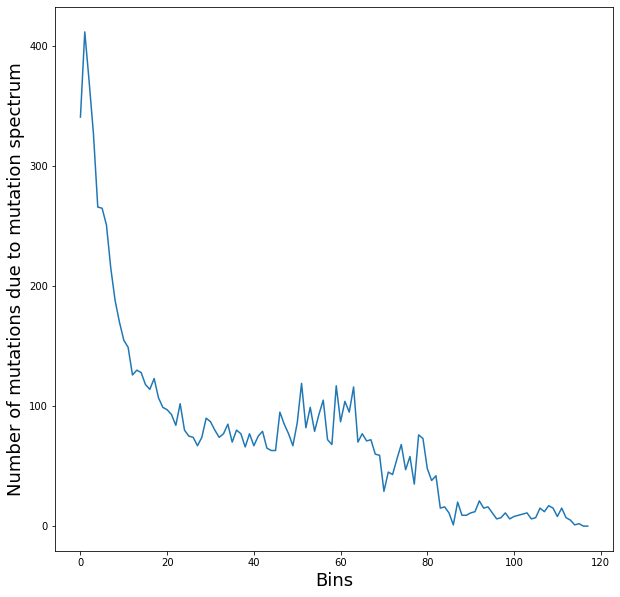

In [78]:
plt.figure(figsize=(10,10))
bins['spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations due to mutation spectrum', fontsize=18)
plt.show()
plt.close()

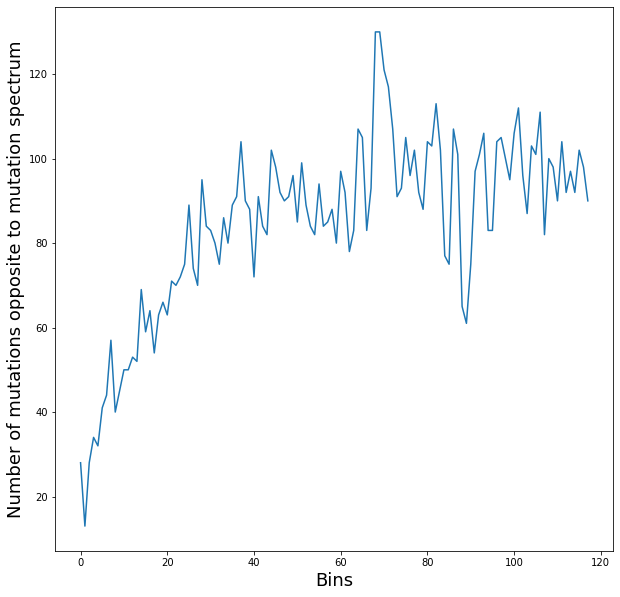

In [79]:
plt.figure(figsize=(10,10))
bins['oppos_spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations opposite to mutation spectrum', fontsize=18)
plt.show()
plt.close()

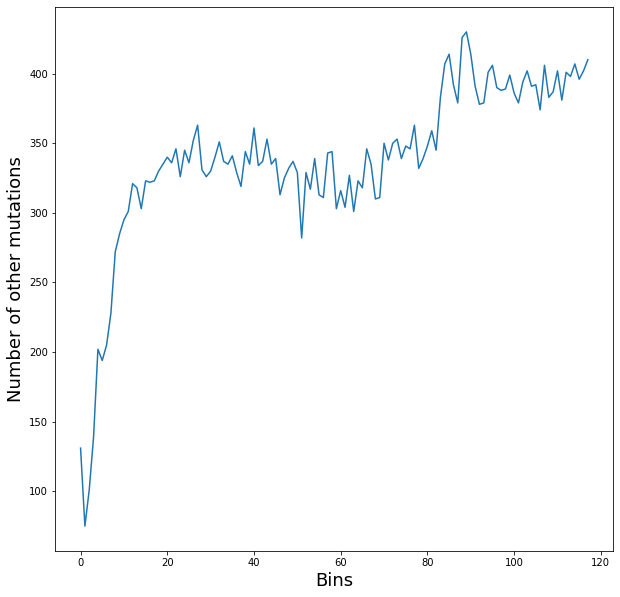

In [80]:
plt.figure(figsize=(10,10))
bins['other_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of other mutations', fontsize=18)
plt.show()
plt.close()

Видно, что тенденции в мутациях по мутспеку и против противоположны за исключением последних бинов где превалируют прочие мутации

In [81]:
bins['due_to_oppos'] = bins['spec_number'] / (bins['oppos_spec_number'] + bins['spec_number'])
bins['due_to_all'] = bins['spec_number'] / (bins['spec_number'] + bins['oppos_spec_number'] + bins['other_number'])

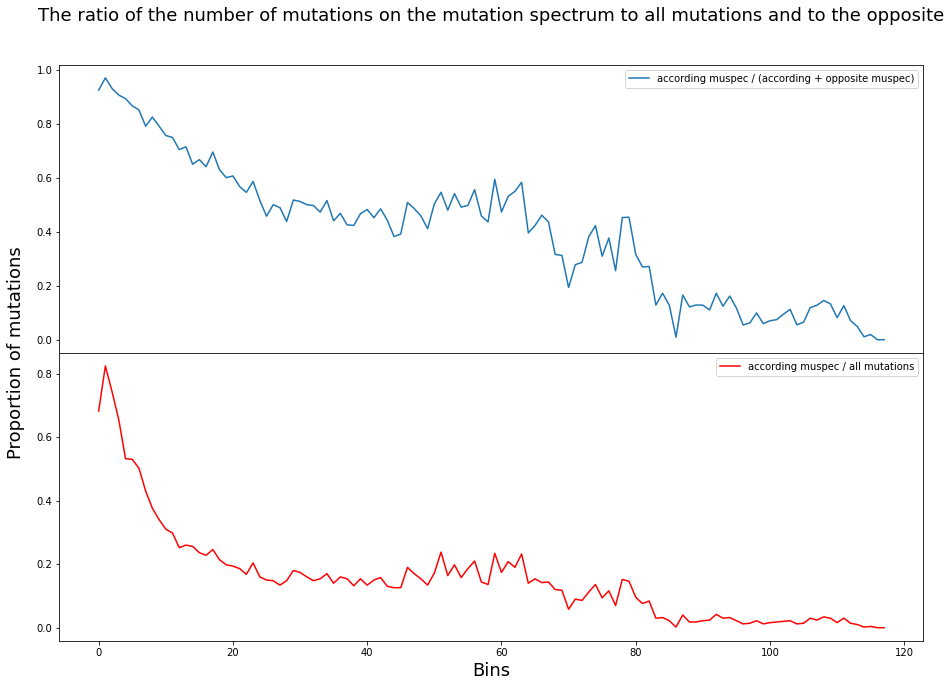

In [82]:
fig, axs = plt.subplots(2, figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0)

fig.suptitle('The ratio of the number of mutations on the mutation spectrum to all mutations and to the opposite', fontsize=18)
plt.xlabel('Bins', fontsize=18)

fig.text(0.06, 0.5, 'Proportion of mutations', ha='center', va='center', rotation='vertical', size=18)

a = sns.lineplot(ax=axs[0], x="bin_number", y="due_to_oppos", data=bins,
                 label='according muspec / (according + opposite muspec)')
axs[0].axes.get_xaxis().set_ticks([])
axs[0].set_xlabel('')
axs[0].set_ylabel('')

b = sns.lineplot(ax=axs[1], x="bin_number", y="due_to_all", data=bins, color='r', 
                 label='according muspec / all mutations')
axs[1].set_ylabel('')

plt.savefig('all_covgue.jpg')
plt.show()
plt.close()

Теперь разделим данные на ORF1ab и все остальные и проделаем тоже самое, начиная с разделения по бинам.

In [83]:
df['ORF'].value_counts()

ORF1ab/nsp3         11567
S                    7723
ORF1ab/nsp12         5308
ORF1ab/nsp2          3962
ORF1ab/nsp4          3212
ORF1ab/nsp13         3079
ORF1ab/nsp14A2-B     3054
N                    2703
ORF1ab/nsp15A1-B     2084
ORF1ab/nsp5A-B       1994
ORF1ab/nsp6          1919
ORF3a                1788
ORF1ab/nsp16         1728
ORF1ab/nsp8          1276
M                    1212
ORF1ab/nsp1          1131
ORF1ab/nsp10          907
ORF8                  861
ORF7a                 839
ORF1ab/nsp9           720
ORF1ab/nsp7           538
ORF6                  424
E                     412
ORF7b                 310
ORF10                 272
Name: ORF, dtype: int64

In [84]:
orfdf = df.loc[df['ORF'].str.contains("ORF1ab", case=False)].reset_index(drop=True)
noorfdf = df.loc[~df['ORF'].str.contains("ORF1ab", case=False)].reset_index(drop=True)

In [85]:
orfdf

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to,nuc_change_num,from_nuc,to_nuc,mut_status,mut_status_char
0,All,ORF1ab/nsp12,323,P323L,P4715L,nonsyn,14407,14408,14409,cCt,cTt,5144375,0.983923,P,L,1,C,T,1,C>U G>U
1,All,ORF1ab/nsp13,77,P77L,P5401L,nonsyn,16465,16466,16467,cCa,cTa,2737605,0.523599,P,L,1,C,T,1,C>U G>U
2,All,ORF1ab/nsp12,671,G671S,G5063S,nonsyn,15451,15452,15453,Ggt,Agt,2718826,0.520008,G,S,1,G,A,0,unknown
3,All,ORF1ab/nsp4,492,T492I,T3255I,nonsyn,10028,10029,10030,aCc,aTc,2468093,0.472052,T,I,1,C,T,1,C>U G>U
4,All,ORF1ab/nsp6,77,T77A,T3646A,nonsyn,11201,11202,11203,Act,Gct,2426563,0.464109,T,A,1,A,G,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42474,All,ORF1ab/nsp10,58,T58P,T4311P,nonsyn,13196,13197,13198,Aca,Cca,2,0.000000,T,P,1,A,C,0,unknown
42475,All,ORF1ab/nsp10,58,T58R,T4311R,nonsyn,13196,13197,13198,aCa,aGa,1,0.000000,T,R,1,C,G,0,unknown
42476,All,ORF1ab/nsp10,54,A54P,A4307P,nonsyn,13184,13185,13186,Gca,Cca,2,0.000000,A,P,1,G,C,0,unknown
42477,All,ORF1ab/nsp10,53,Q53E,Q4306E,nonsyn,13181,13182,13183,Cag,Gag,1,0.000000,Q,E,1,C,G,0,unknown


In [86]:
noorfdf

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to,nuc_change_num,from_nuc,to_nuc,mut_status,mut_status_char
0,All,S,614,D614G,,nonsyn,23402,23403,23404,gAt,gGt,5182511,0.991216,D,G,1,A,G,0,unknown
1,All,S,452,L452R,,nonsyn,22916,22917,22918,cTg,cGg,2772069,0.530191,L,R,1,T,G,-1,U>C U>G
2,All,M,82,I82T,,nonsyn,26766,26767,26768,aTc,aCc,2769241,0.529650,I,T,1,T,C,-1,U>C U>G
3,All,S,681,P681R,,nonsyn,23603,23604,23605,cCt,cGt,2762560,0.528372,P,R,1,C,G,0,unknown
4,All,ORF3a,26,S26L,,nonsyn,25468,25469,25470,tCa,tTa,2758877,0.527668,S,L,1,C,T,1,C>U G>U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16539,All,N,286,F286Y,,nonsyn,29129,29130,29131,tTt,tAt,1,0.000000,F,Y,1,T,A,0,unknown
16540,All,N,285,N285K,,nonsyn,29126,29127,29128,aaT,aaG,2,0.000000,N,K,1,T,G,-1,U>C U>G
16541,All,N,285,N285T,,nonsyn,29126,29127,29128,aAt,aCt,2,0.000000,N,T,1,A,C,0,unknown
16542,All,N,285,N285Y,,nonsyn,29126,29127,29128,Aat,Tat,2,0.000000,N,Y,1,A,T,0,unknown


# В Начале ORF1ab

In [87]:
binnumber = 0
bins = pd.DataFrame()
for i in range(0,len(orfdf),350):
    if i != 0:
        dfbin = orfdf[i-350:i]
        
        dfbininterest = len(dfbin[dfbin['mut_status'] == 1])
        dfbinopposite = len(dfbin[dfbin['mut_status'] == -1])
        dfbinother = len(dfbin[dfbin['mut_status'] == 0])
        
        onebin = pd.DataFrame({'bin_number':binnumber, 'spec_number':dfbininterest,
                               'oppos_spec_number':dfbinopposite, 'other_number':dfbinother}, index=[binnumber])
        binnumber+=1
        bins = bins.append(onebin)

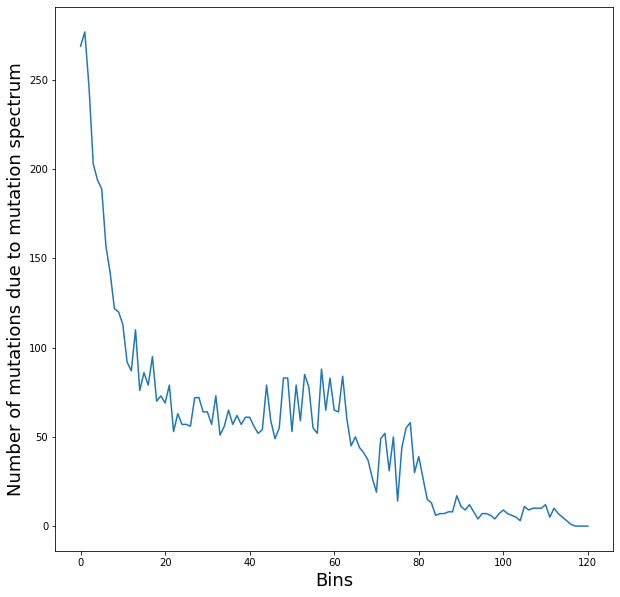

In [88]:
plt.figure(figsize=(10,10))
bins['spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations due to mutation spectrum', fontsize=18)
plt.show()
plt.close()

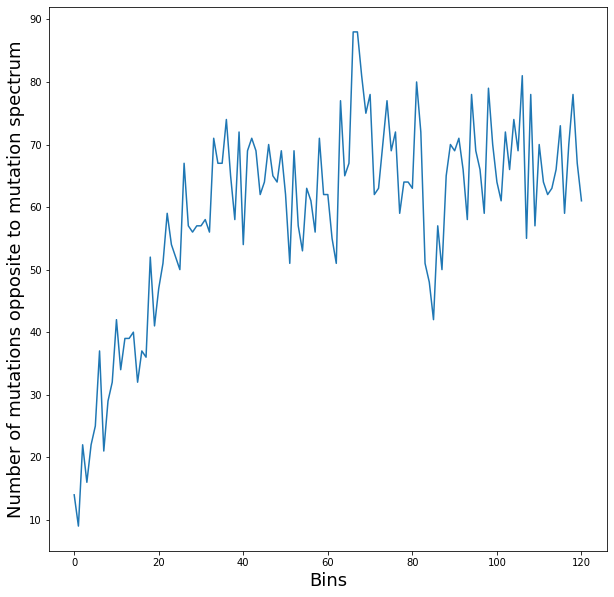

In [89]:
plt.figure(figsize=(10,10))
bins['oppos_spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations opposite to mutation spectrum', fontsize=18)
plt.show()
plt.close()

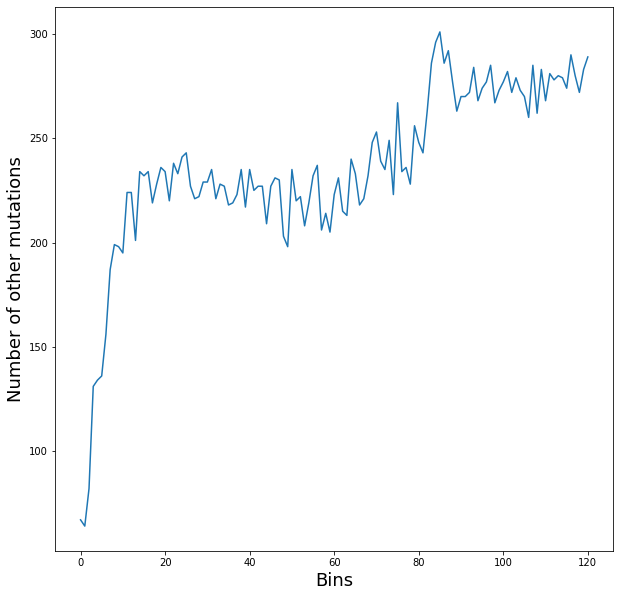

In [90]:
plt.figure(figsize=(10,10))
bins['other_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of other mutations', fontsize=18)
plt.show()
plt.close()

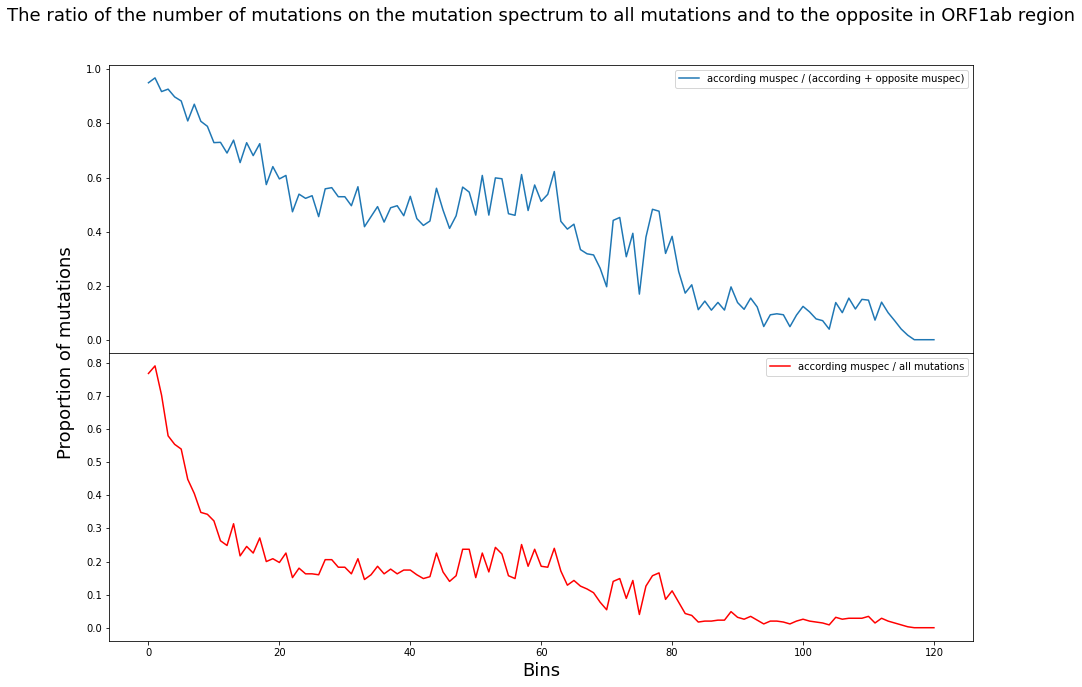

In [91]:
bins['due_to_oppos'] = bins['spec_number'] / (bins['oppos_spec_number'] + bins['spec_number'])
bins['due_to_all'] = bins['spec_number'] / (bins['spec_number'] + bins['oppos_spec_number'] + bins['other_number'])

fig, axs = plt.subplots(2, figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0)

fig.suptitle('The ratio of the number of mutations on the mutation spectrum to all mutations and to the opposite in ORF1ab region', fontsize=18)
plt.xlabel('Bins', fontsize=18)

fig.text(0.06, 0.5, 'Proportion of mutations', ha='center', va='center', rotation='vertical', size=18)

a = sns.lineplot(ax=axs[0], x="bin_number", y="due_to_oppos", data=bins,
                 label='according muspec / (according + opposite muspec)')
axs[0].axes.get_xaxis().set_ticks([])
axs[0].set_xlabel('')
axs[0].set_ylabel('')

b = sns.lineplot(ax=axs[1], x="bin_number", y="due_to_all", data=bins, color='r', 
                 label='according muspec / all mutations')
axs[1].set_ylabel('')

plt.savefig('orf_covgue.jpg')
plt.show()
plt.close()

# Теперь не ORF1ab

In [92]:
binnumber = 0
bins = pd.DataFrame()
for i in range(0,len(noorfdf),150):
    if i != 0:
        dfbin = noorfdf[i-150:i]
        
        dfbininterest = len(dfbin[dfbin['mut_status'] == 1])
        dfbinopposite = len(dfbin[dfbin['mut_status'] == -1])
        dfbinother = len(dfbin[dfbin['mut_status'] == 0])
        
        onebin = pd.DataFrame({'bin_number':binnumber, 'spec_number':dfbininterest,
                               'oppos_spec_number':dfbinopposite, 'other_number':dfbinother}, index=[binnumber])
        binnumber+=1
        bins = bins.append(onebin)

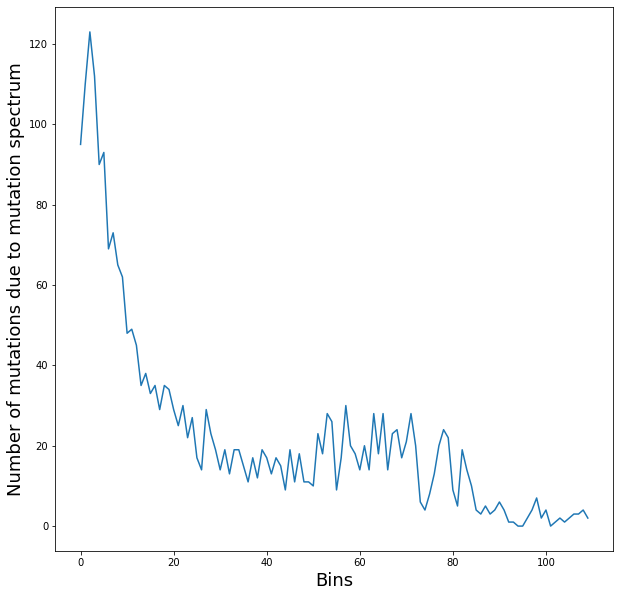

In [93]:
plt.figure(figsize=(10,10))
bins['spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations due to mutation spectrum', fontsize=18)
plt.show()
plt.close()

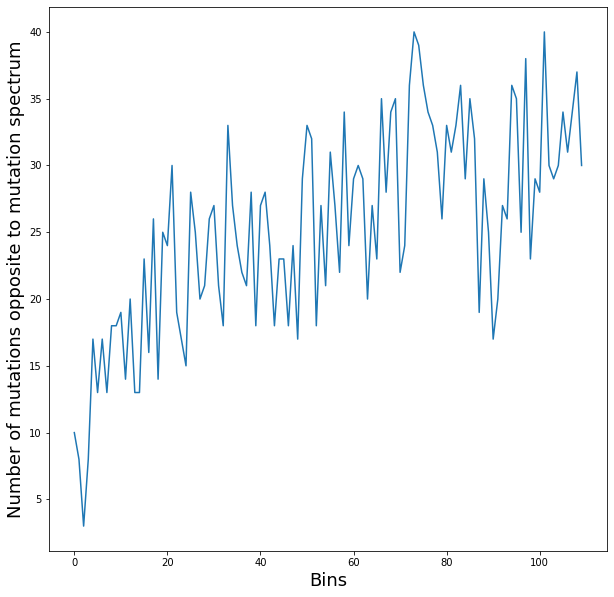

In [94]:
plt.figure(figsize=(10,10))
bins['oppos_spec_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of mutations opposite to mutation spectrum', fontsize=18)
plt.show()
plt.close()

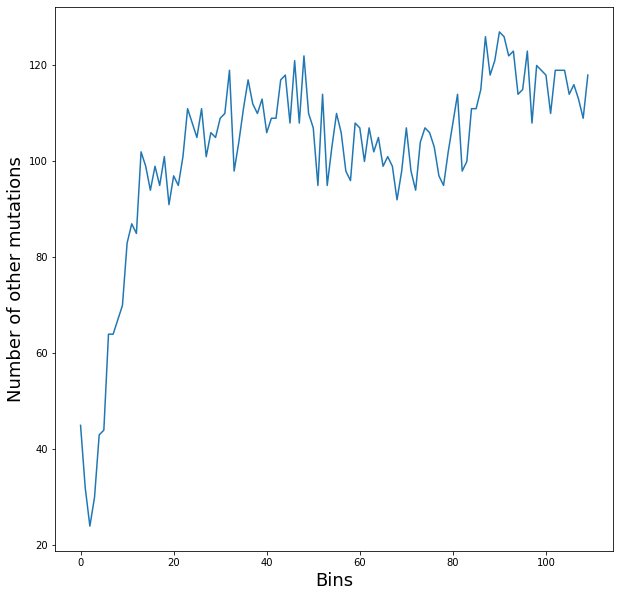

In [95]:
plt.figure(figsize=(10,10))
bins['other_number'].plot()
plt.xlabel('Bins', fontsize=18)
plt.ylabel('Number of other mutations', fontsize=18)
plt.show()
plt.close()

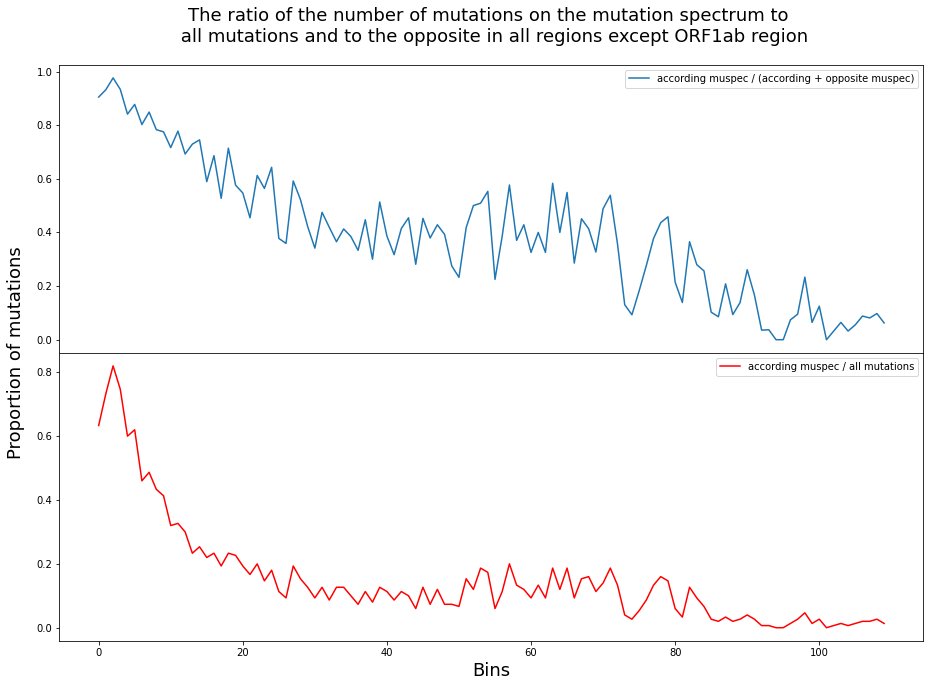

In [96]:
bins['due_to_oppos'] = bins['spec_number'] / (bins['oppos_spec_number'] + bins['spec_number'])
bins['due_to_all'] = bins['spec_number'] / (bins['spec_number'] + bins['oppos_spec_number'] + bins['other_number'])

fig, axs = plt.subplots(2, figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0)

fig.suptitle('The ratio of the number of mutations on the mutation spectrum to \n all mutations and to the opposite in all regions except ORF1ab region', fontsize=18)
plt.xlabel('Bins', fontsize=18)

fig.text(0.06, 0.5, 'Proportion of mutations', ha='center', va='center', rotation='vertical', size=18)

a = sns.lineplot(ax=axs[0], x="bin_number", y="due_to_oppos", data=bins,
                 label='according muspec / (according + opposite muspec)')
axs[0].axes.get_xaxis().set_ticks([])
axs[0].set_xlabel('')
axs[0].set_ylabel('')

b = sns.lineplot(ax=axs[1], x="bin_number", y="due_to_all", data=bins, color='r', 
                 label='according muspec / all mutations')
axs[1].set_ylabel('')

plt.savefig('noorf_covgue.jpg')
plt.show()
plt.close()